In [276]:
import pandas as pd
import numpy as np
import json
import re
import string
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [277]:
df = pd.read_csv("lyrics.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [278]:
df

,track_name,artist,lyrics
0,Problems In Us,Col3trane,[Pre-Chorus]I couldn't believe that you would ...
1,New Shapes,Diplo,\n\n[Chorus]\nYou don't show me no sign of you...
2,Throwaway,SG Lewis,\n\n[Verse 1]\nSometimes I know what's right f...
3,Electrian,DJ Seinfeld,NaN
4,Skip,SuperParka,\n\nI will not always be your friend\nTell you...
...,...,...,...
95,Softly,Clairo,\n\n[Verse 1]\nIs it alright to feel this way ...
96,Club Paradise - Zodivk Remix,Savy Soul,NaN
97,"Pumpy (feat. AJ x Deno, Swarmz & Cadet)",Da Beatfreakz,\n\n[Intro: Swarmz & Cadet]\nThis is the 9 sid...
98,Nevermind,Dennis Lloyd,[Intro]What if I left and it made no senseAnd ...


In [279]:
df = df.dropna()
df = df.loc[df['lyrics'] != "[Non-Lyrical Vocals]"]
df = df.loc[df['lyrics'] != '']

In [280]:
df.reset_index(drop=True, inplace=True)

In [281]:
song_lyrics = df['lyrics']

In [282]:
for i in range(len(song_lyrics)):
    song_lyrics[i] = re.sub("[\(\[].*?[\)\]]", " ", str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].replace("\n", " ")
    song_lyrics[i] = re.sub(r"(\w)([A-Z])", r"\1 \2", str(song_lyrics[i]))

In [283]:
len(df)

66

In [284]:
sid = SentimentIntensityAnalyzer()

In [285]:
for i in range(len(df)):
    sentiment = sid.polarity_scores(df.loc[i, 'lyrics'])
    df.loc[i, 'neg'] = sentiment['neg']
    df.loc[i, 'neu'] = sentiment['neu']
    df.loc[i, 'pos'] = sentiment['pos']
    df.loc[i, 'compound'] = sentiment['compound']

In [286]:
df.head()

,track_name,artist,lyrics,neg,neu,pos,compound
0,Problems In Us,Col3trane,I couldn't believe that you would call Anothe...,0.217,0.673,0.110,-0.9497
1,New Shapes,Diplo,You don't show me no sign of your innocent...,0.103,0.677,0.221,0.9868
2,Throwaway,SG Lewis,Sometimes I know what's right for me And I...,0.028,0.836,0.135,0.9761
3,Skip,SuperParka,I will not always be your friend Tell yourse...,0.096,0.757,0.147,0.6535
4,Mile High (feat. Travis Scott & Metro Boomin),James Blake,"Don't wanna see you by yourself, by yourse...",0.036,0.827,0.137,0.9893


In [287]:
df.loc[0, 'lyrics']

" I couldn't believe that you would call Another man to keep you company, yeah I swear all the times that you would talk to me I'd be on my best behavior If that ain't enough, I'm soberin' up The problems in you, the problems in us The problems in us, the problems in us The problems in us, the problems in us But even my momma said to me  That you were rude and that you talk too much I don't give a fuck, and if you want I'll be your best man on my worst behavior If that ain't enough, I'm soberin' up The problems in you, the problems in us  The problems in us, the problems in us  The problems in us, the problems in us I couldn't believe that you would call Another man to keep you company, yeah I swear all the times that you would talk to me I'd be on my best behavior"

In [288]:
sentiment = []
for i, row in df.iterrows():
    if row['compound'] > 0:
        sentiment.append("Positive")
    else:
        sentiment.append("Negative")
df["Sentiment"] = sentiment

In [289]:
df

,track_name,artist,lyrics,neg,neu,pos,compound,Sentiment
0,Problems In Us,Col3trane,I couldn't believe that you would call Anothe...,0.217,0.673,0.110,-0.9497,Negative
1,New Shapes,Diplo,You don't show me no sign of your innocent...,0.103,0.677,0.221,0.9868,Positive
2,Throwaway,SG Lewis,Sometimes I know what's right for me And I...,0.028,0.836,0.135,0.9761,Positive
3,Skip,SuperParka,I will not always be your friend Tell yourse...,0.096,0.757,0.147,0.6535,Positive
4,Mile High (feat. Travis Scott & Metro Boomin),James Blake,"Don't wanna see you by yourself, by yourse...",0.036,0.827,0.137,0.9893,Positive
...,...,...,...,...,...,...,...,...
61,Predicament,Kllo,Though to be the one I can think about it ...,0.096,0.859,0.045,-0.9554,Negative
62,Switch,6LACK,I'm thinking 'bout a Yamaha I'm thinking 'bo...,0.034,0.675,0.291,0.9858,Positive
63,Softly,Clairo,Is it alright to feel this way so early? A...,0.030,0.843,0.127,0.9503,Positive
64,"Pumpy (feat. AJ x Deno, Swarmz & Cadet)",Da Beatfreakz,This is the 9 side C AD ET Beat Freakz ...,0.093,0.792,0.115,0.9230,Positive


In [290]:
df.rename(columns={'neg':'Negative','pos':'Positive'}, inplace=True)

In [291]:
import seaborn as sns
sns.set_context(context='poster')

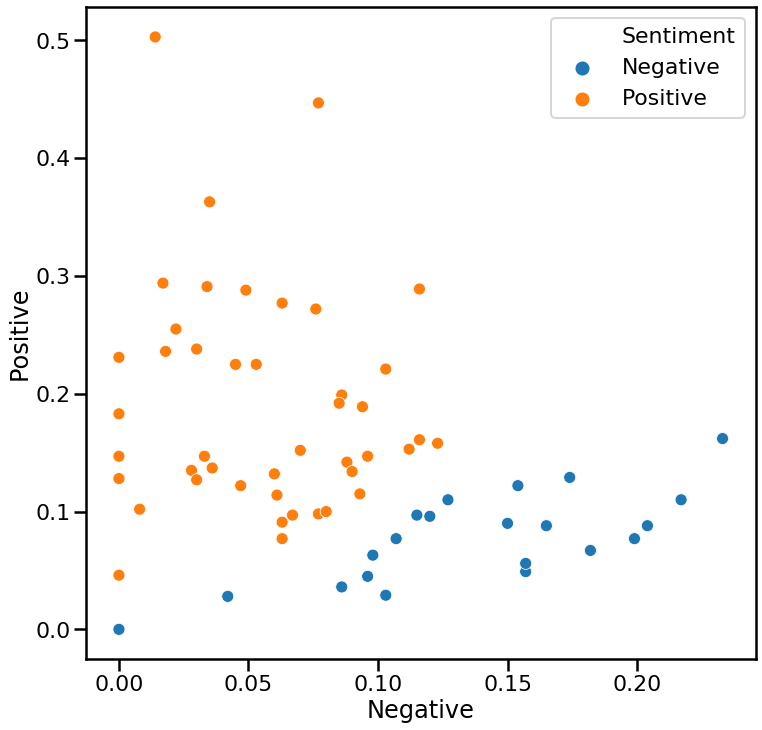

In [292]:
plt.figure(figsize=(12,12))
plt.plot([0,0],[0.25,0.25], linewidth=2)
ax = sns.scatterplot(x="Negative", y="Positive", data=df, hue="Sentiment")
plt.show()